In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-housepredict/boston_train.csv
/kaggle/input/boston-housepredict/boston_test.csv


In [89]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# **Importing the data**

In [7]:
df_train=pd.read_csv('/kaggle/input/boston-housepredict/boston_train.csv')
df_train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


Variables in order:

* crim:  per capita crime rate by town
* zn:  proportion of residential land zoned for lots over 25,000 sq.ft.
* indus:  proportion of non-retail business acres per town
* chas:  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* nox:  nitric oxides concentration (parts per 10 million)
* rm:  average number of rooms per dwelling
* age:  proportion of owner-occupied units built prior to 1940
* dis:  weighted distances to five Boston employment centres
* rad:  index of accessibility to radial highways
* tax:  full-value property-tax rate per 10,000 's
* ptratio:  pupil-teacher ratio by town
* black:  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* lstat:  % lower status of the population
* medv:  Median value of owner-occupied homes in $1000's

In [8]:
df_train.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


# **Analyzing the data**

In [11]:
df_train.shape 

(333, 15)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [24]:
df_train.drop('ID', axis = 1, inplace=True)

**Checking for missing values**

In [25]:
df_train.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### **Exploratory Data Analysis**

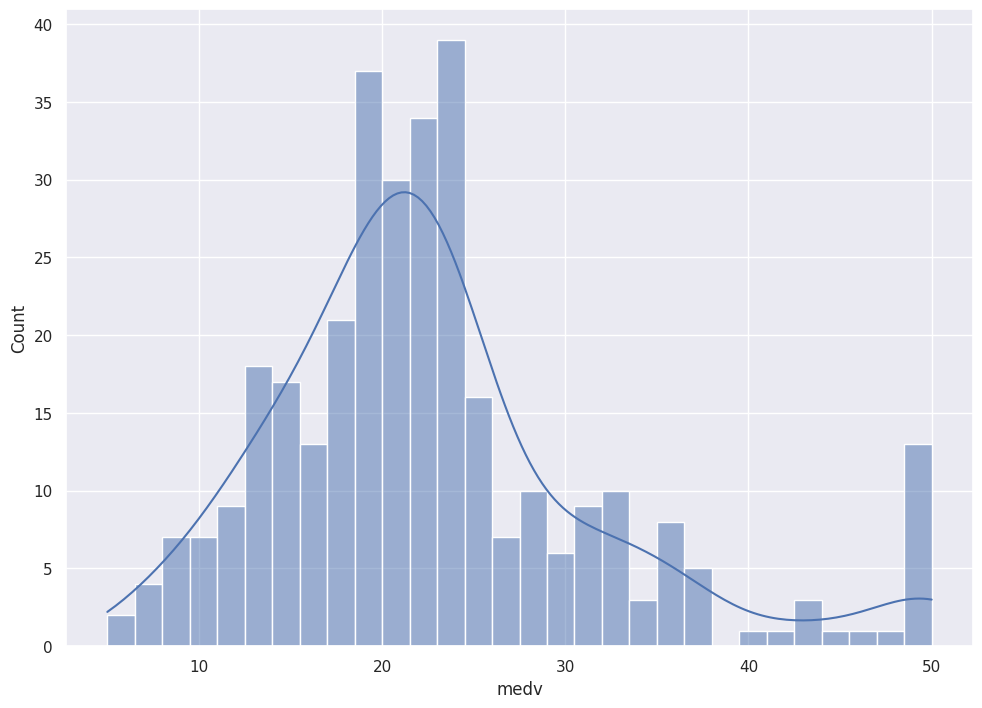

In [106]:
sns.histplot(df_train['medv'],bins=30, kde=True)
plt.savefig('Exploratory.png',dpi=500)
plt.show()

# **Correlation**

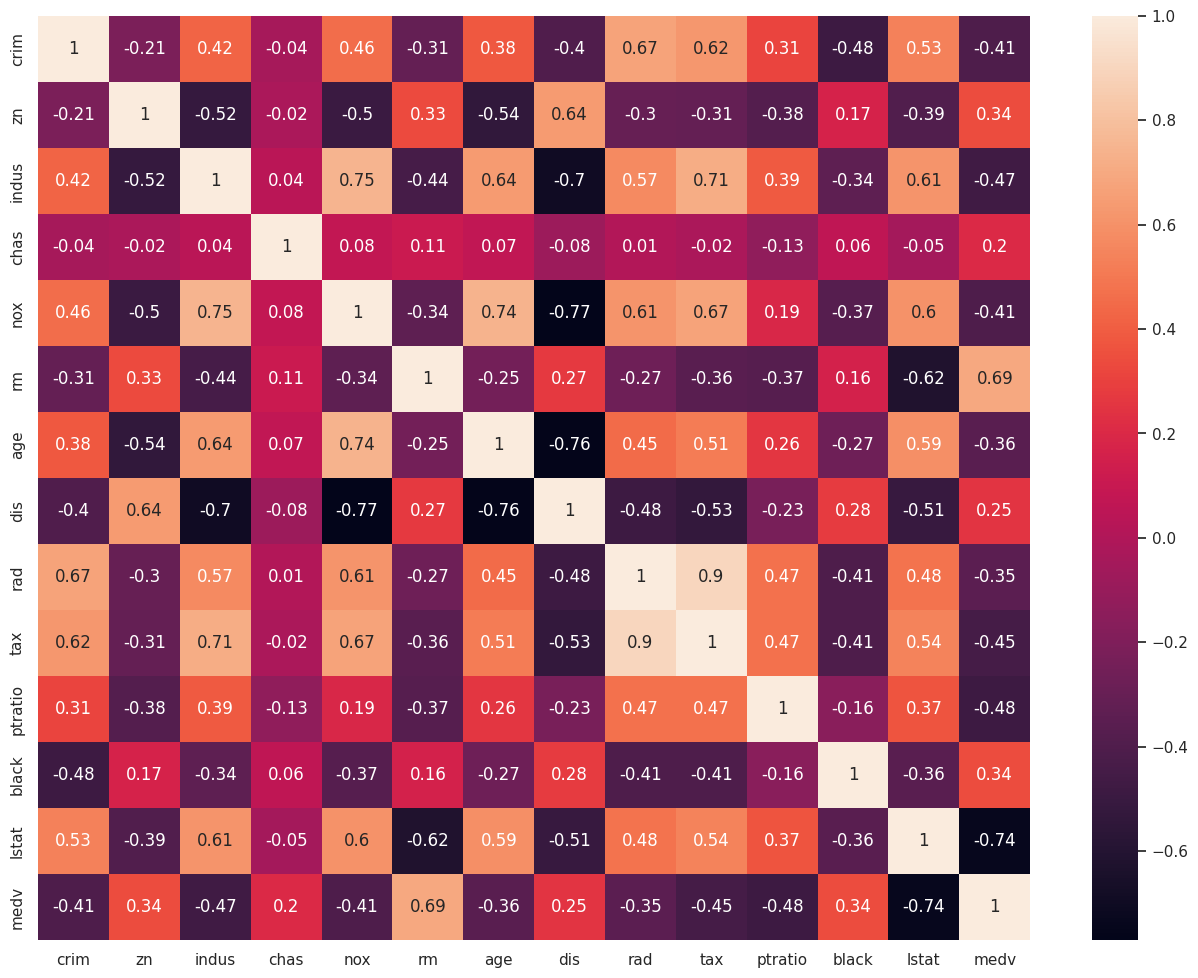

In [41]:
plt.subplots(figsize=(16,12))
correlation = df_train.corr().round(2)
sns_plot=sns.heatmap(correlation, annot=True)

## **Observation**

we found out that (**indus**) and (**nox**) have stronge poistive correlation which is (**0.75**), also (**indus**) and (**nos**),  While (**IStat**) with (**medv**) have the highist negative correlation (**-0.74**). But (**rad**) and (**tax**) has the highest positive corrleation wich is (**0.9**) which should be executed because it causes instability to the parameters 


# **Visualizng the data**

<Axes: >

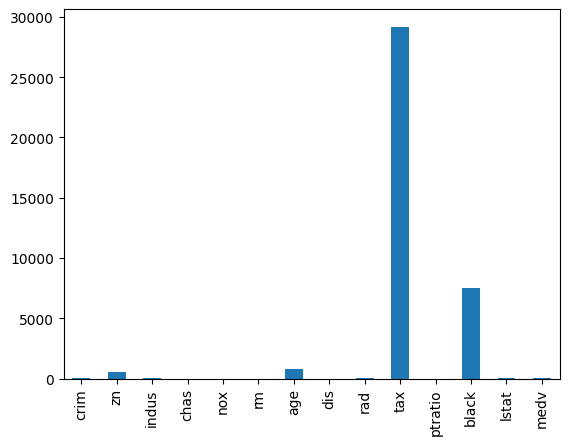

In [28]:
df_train.var().plot.bar()

<Axes: xlabel='lstat', ylabel='medv'>

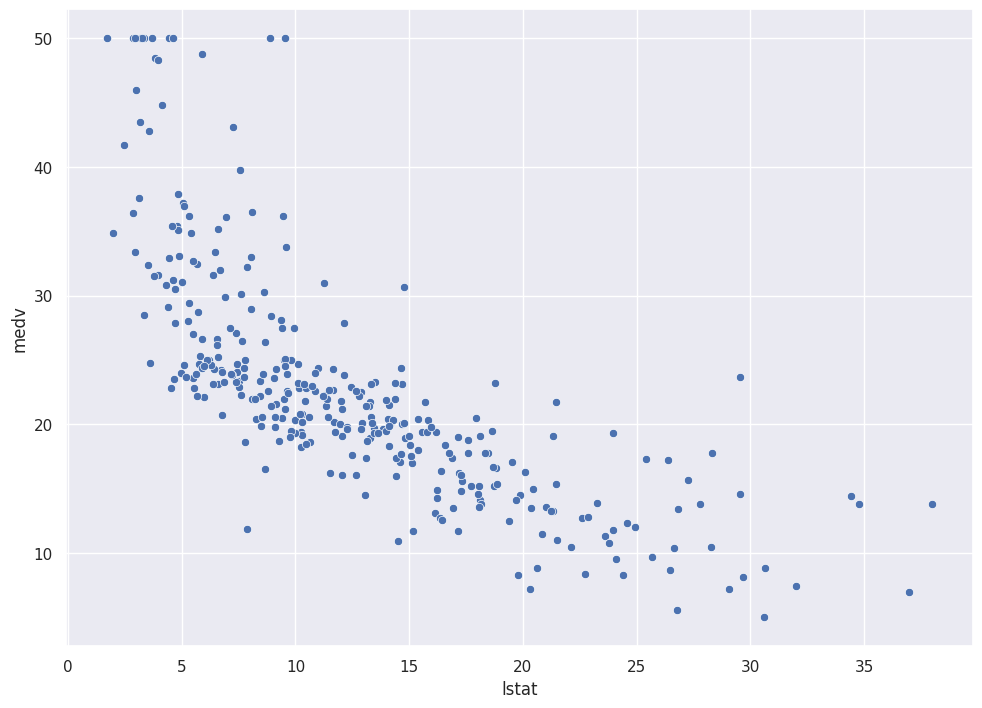

In [46]:
sns.scatterplot(x='lstat', y='medv', data=df_train)

#### The prices decreases as the value of (**lstat**) increases

<Axes: xlabel='medv', ylabel='rm'>

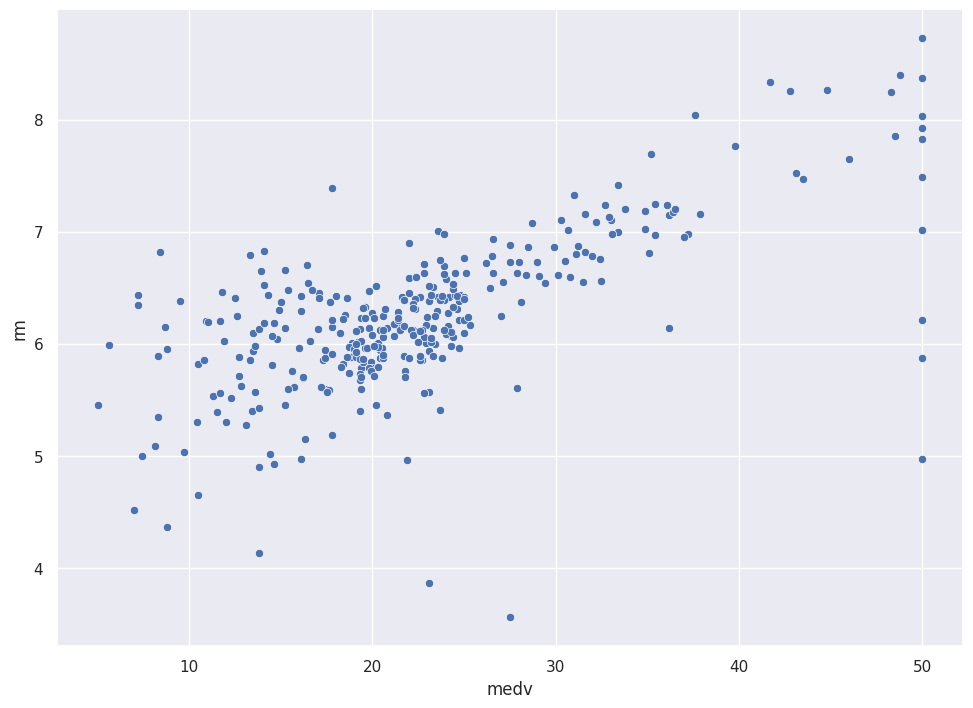

In [48]:
sns.scatterplot(x='medv', y='rm', data=df_train)

#### The prices increases as the value of (**rm**) increases

<Axes: xlabel='nox', ylabel='indus'>

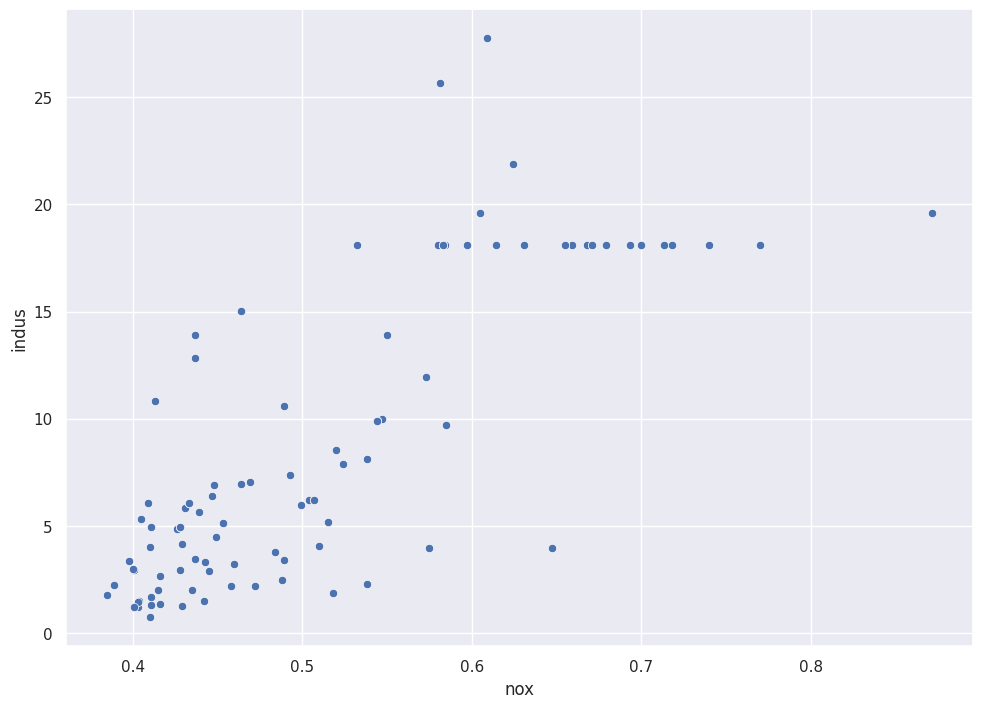

In [43]:
sns.scatterplot(x='nox', y='indus', data=df_train)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



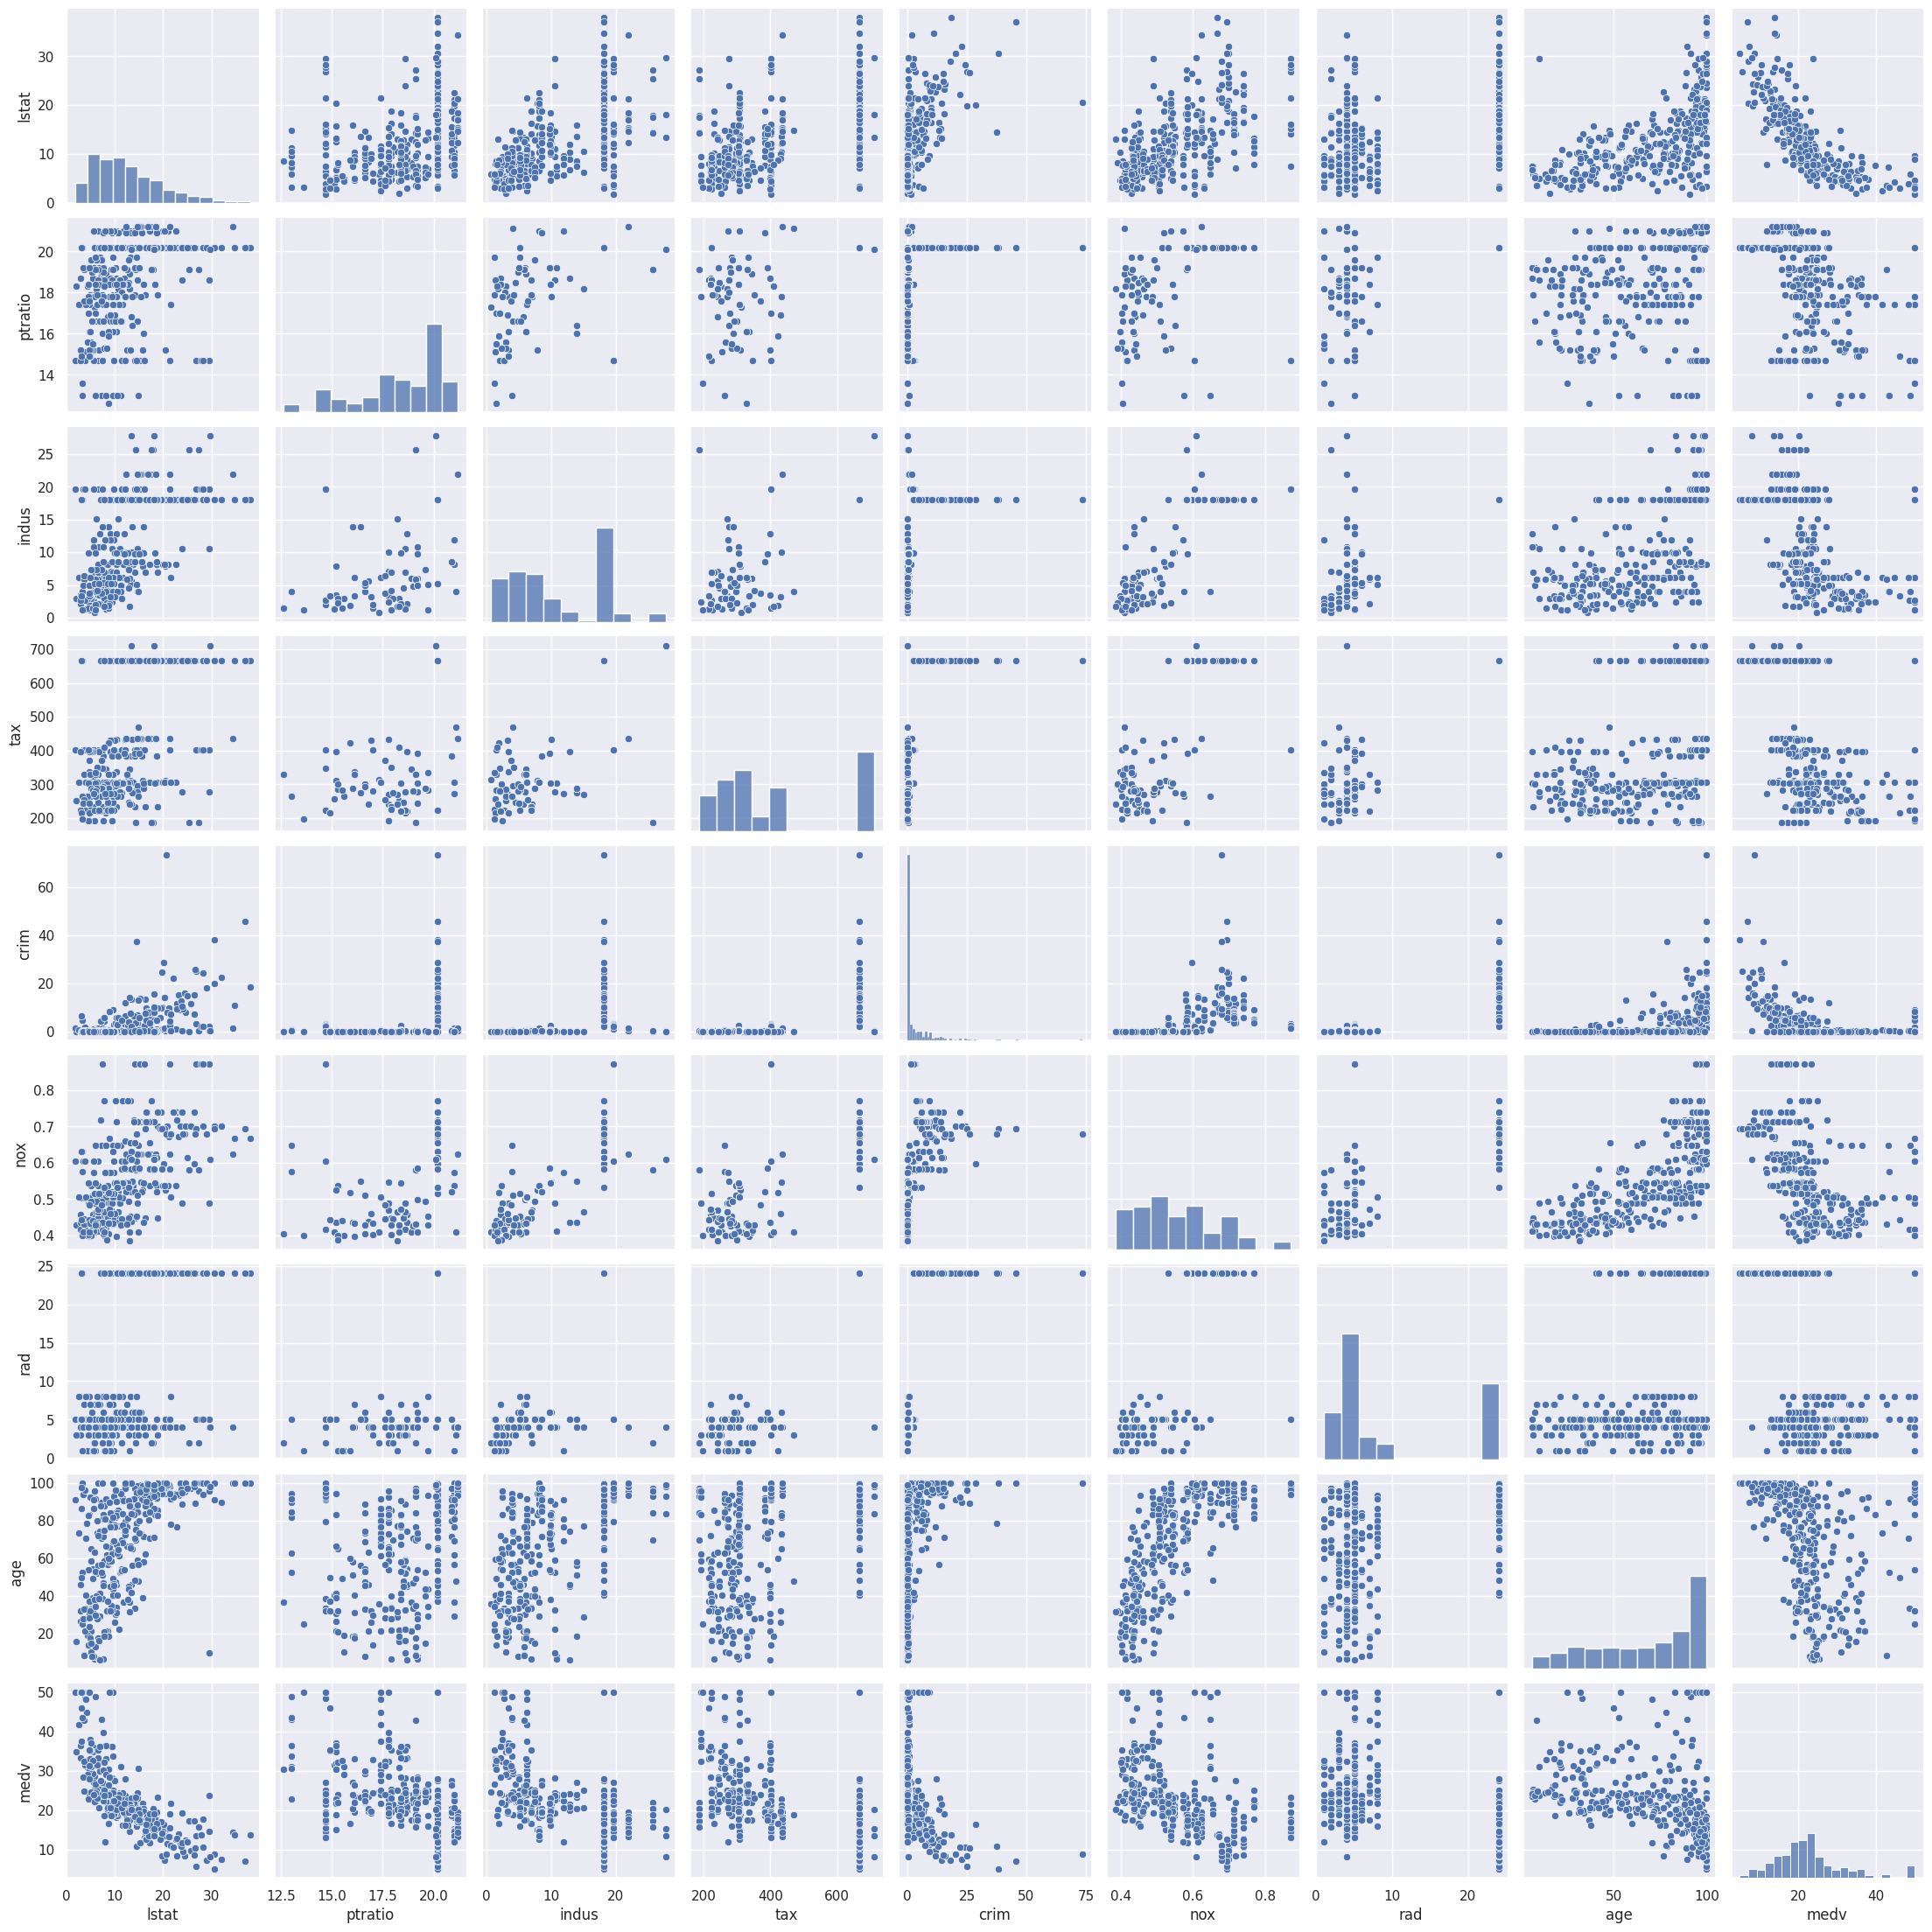

In [49]:
#More Linear patterns
sns.pairplot(df_train, vars = ['lstat', 'ptratio', 'indus', 'tax', 'crim', 'nox', 'rad', 'age', 'medv']);

### **Preparing the data for Training**

**X**: Independent values

**Y**: Dependent values

In [58]:
X = df_train.iloc[:,1:-1].values
Y = df_train.iloc[:,-1].values

### **Linear Regression**

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20 , random_state=0)

In [78]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
Lr_pred = model.predict(X_test)

In [82]:
# Model evaluation
score = model.score(X_train,y_train)
print('The Model Performance for training set')
print('ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ')
print('Coefficient of determination:',score)
print('ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ')
print('Mean Absolute Error:',mean_absolute_error(y_test,Lr_pred))
print('ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ')
print('Root Mean Squared Error:',np.sqrt
      (mean_absolute_error(y_test,Lr_pred)))

The Model Performance for training set
ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ
Coefficient of determination: 0.7286376541551873
ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ
Mean Absolute Error: 3.3105464106006792
ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ
Root Mean Squared Error: 1.8194907008832661


### **Gradient Boosting regression**

In [72]:
# Initialize and train the Gradient Boosting Regression model
Grad_Bost = GradientBoostingRegressor()
Grad_Bost.fit(X_train, y_train)

GradientBoostingRegressor()

In [83]:
# Make predictions on the test set
GR_pred = model.predict(X_test)

In [99]:
# Model evaluation
score1 = Grad_Bost.score(X_train,y_train)
print('The Model Performance for training set')
print('ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ')
print('Coefficient of determination:',score1)
print('ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ')
print('Mean Absolute Error:',mean_absolute_error(y_test,GR_pred))
print('ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ')
print('Root Mean Squared Error:',np.sqrt
      (mean_absolute_error(y_test,GR_pred)))

The Model Performance for training set
ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ
Coefficient of determination: 0.983870019427318
ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ
Mean Absolute Error: 3.3105464106006792
ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ
Root Mean Squared Error: 1.8194907008832661


### **Random Forset**

In [85]:
# Initialize and train the Random Forest Regression model
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [87]:
# Make predictions on the test set
y_pred = forest.predict(X_test)

In [94]:
# Model evaluation
score2 = forest.score(X_train,y_train)
print('The Model Performance for training set')
print('ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ')
print('Coefficient of determination:',score2)
print('ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ')
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ')
print('Root Mean Squared Error:',np.sqrt
      (mean_absolute_error(y_test,y_pred)))

The Model Performance for training set
ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ
Coefficient of determination: 0.9768548631941406
ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ
Mean Absolute Error: 2.040089552238805
ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ
Root Mean Squared Error: 1.4283170349186503


### **Support Vector Machine**

In [95]:
# Initialize and train the Support Vector Regression model
model2 = SVR()
model2.fit(X_train, y_train)

SVR()

In [96]:
# Make predictions on the test set
svm_pred = model2.predict(X_test)

In [97]:
# Model evaluation
score3 = model2.score(X_train,y_train)
print('The Model Performance for training set')
print('ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ')
print('Coefficient of determination:',score3)
print('ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ')
print('Mean Absolute Error:',mean_absolute_error(y_test,svm_pred))
print('ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ')
print('Root Mean Squared Error:',np.sqrt
      (mean_absolute_error(y_test,svm_pred)))

The Model Performance for training set
ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ
Coefficient of determination: 0.20357135721550856
ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ
Mean Absolute Error: 5.206610514529837
ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ
Root Mean Squared Error: 2.281799841031162


## **The preformance of all Models**

In [100]:
print('The Performance for all Models')
print('ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ')
print('Coefficient of Linear Regression:',score)
print('ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ')
print('Coefficient of Gradient Boosting Regression:',score1)
print('ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ')
print('Coefficient of Random Forset:',score2)
print('ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ')
print('Coefficient of SVM:',score3)

The Performance for all Models
ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ
Coefficient of Linear Regression: 0.20357135721550856
ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ
Coefficient of Gradient Boosting Regression: 0.983870019427318
ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ
Coefficient of Random Forset: 0.9768548631941406
ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ،ــ
Coefficient of SVM: 0.20357135721550856


#### **Observation:**

The best Preformed model is the **Gradient Boosring Regression model** 

The Worst Preformed model is the **SVM model**